In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import matplotlib.animation as animation

In [3]:
%run DMD_functions.ipynb 

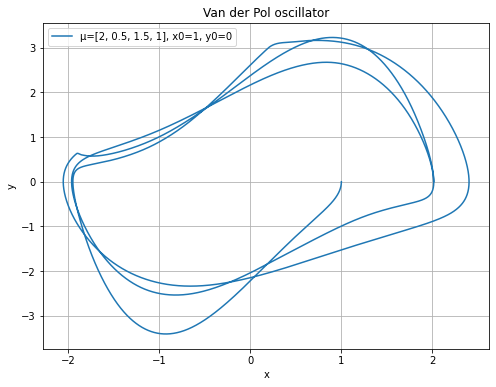

In [4]:
#Van der Pol oscillator system
initial_condition = (1,0)
mu = [2, 0.5, 1.5, 1]
t_span=(0,20-1e-5)
t_eval = np.linspace(t_span[0], t_span[1]-1e-5, 2000000)


def van_der_pol(t, state, mu):
    x, y = state
    dxdt = y
    mu_u = mu[int(t//5)]
    dydt = mu_u * (1 - x**2) * y - x
    return [dxdt, dydt]

"""solution= solve_ivp(van_der_pol, t_span, [initial_condition[0], initial_condition[1]], args=(mu[0],), t_eval=t_eval[500000*i:500000*(i+1)], vectorized=True)
solution=solution.y
for i in range(1, 4):
    sol=solve_ivp(van_der_pol, t_span, [solution[0,-1], solution[1,-1]], args=(mu[i],), t_eval=t_eval[500000*i:500000*(i+1)], vectorized=True)
    solution=np.concatenate((solution, sol.y), axis=1)"""
sol = solve_ivp(van_der_pol, t_span, [initial_condition[0], initial_condition[1]], args=(mu,), t_eval=t_eval, vectorized=True) #u sol.y[0] i sol.y[1] su (x,y) koordinate točke za svaki trenutak

#print(sol.y[0].shape, sol.y[1].shape)
#print(sol.t.shape)

plt.figure(figsize=(8,6))
plt.plot(sol.y[0], sol.y[1], label=f"μ={mu}, x0={initial_condition[0]}, y0={initial_condition[1]}")

    
plt.title("Van der Pol oscillator")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()



(2, 2000)


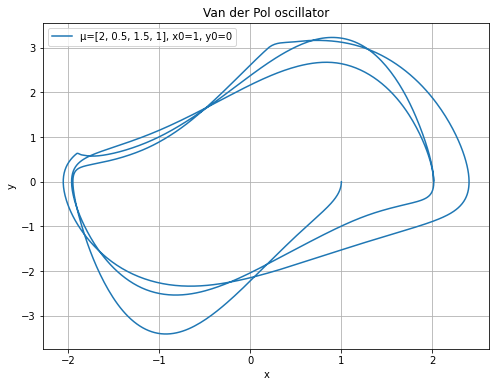

In [5]:
t_used=np.arange(0,2000000,1000)
del (t_eval)
vdp = sol.y[:,t_used]
print(vdp.shape)

plt.figure(figsize=(8, 6))
plt.plot(vdp[0,:], vdp[1,:], label=f"μ={mu}, x0={initial_condition[0]}, y0={initial_condition[1]}")

    
plt.title("Van der Pol oscillator")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

In [10]:
%matplotlib widget

fig, ax = plt.subplots()

line2 = ax.plot(vdp[0,0], vdp[1,0], lw=2)[0]
ax.set_xbound(-4,4); ax.set_ybound(-4,4)
plt.grid()


def update(frame):
    # for each frame, update the data stored on each artist.
    x = vdp[0,:frame]
    y = vdp[1,:frame]
    # update the line plot:
    line2.set_xdata(x)
    line2.set_ydata(y)
    return (line2)


ani = animation.FuncAnimation(fig=fig, func=update, frames=vdp.shape[1], interval=50, blit=True, repeat=False)
plt.show()

<IPython.core.display.Javascript object>

In [11]:
%matplotlib inline

Ako ih ne "stackam" uvijek ću dobiti max dva moda (nakon svd-a,...)

In [6]:

num_stack = 60
m=vdp.shape[1]
vdp_end=vdp[:,-num_stack:]
vdp = vdp[:,:(m-num_stack+1)]

for i in range(1,num_stack):
    added=np.concatenate((vdp[:2,i:], vdp[:2,:i]), axis=1)
    vdp=np.vstack((vdp,added))

In [13]:
#provjera jel dobro formirana matrica..

k=np.random.randint(num_stack, m-num_stack)
for i in range(1,num_stack):
    if(np.all(vdp[:2,k]==vdp[2*i:2*i+2,k-i])):
        print(True, end=" ")
    else:
        print(False, vdp[:2,k],vdp[2*i:2*i+2,k-i])

True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True 

In [14]:
m=vdp.shape[1]-1

Z, L = DMD(vdp[:,:m], vdp[:,1:(m+1)], tol=1e-6)
print(L.shape)

(100,)


In [15]:
Z, L, r, _, _ = GEDMDQ(vdp[:,:m+1], tol=1e-6)
print(L.shape)

(94,)


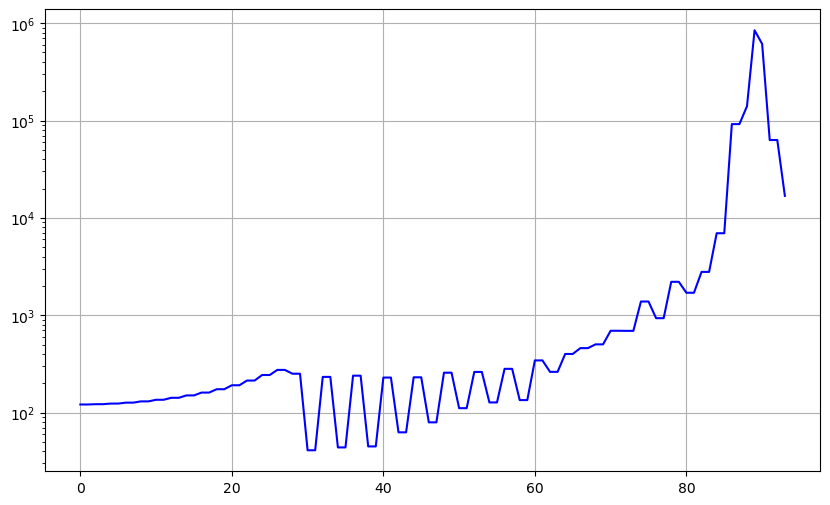

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(1/r, marker='', linestyle='-', color='b')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.grid(True)
plt.show()

In [8]:
threshold = 1e-3
indices = np.where(r<threshold)[0]
print(indices, indices.shape)

[76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93] (18,)


In [9]:
times = [i for i in range(m-100,m+100)]

reconstructed = DMD_reconstruction(vdp[:,:1], Z, indices, L, times)


**uzimamo dio oscilatora - iz toga procjena za dalje**


.

In [10]:
poc=450; zav=550; rec=50

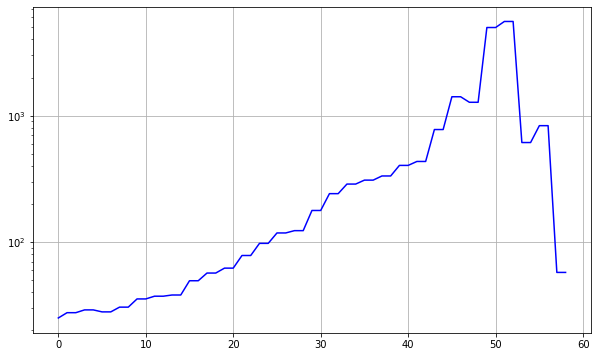

In [11]:
Z, L, r, _, _ = GEDMDQ(vdp[:,poc:zav], tol=1e-6)

plt.figure(figsize=(10, 6))
plt.plot(1/r, marker='', linestyle='-', color='b')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.grid(True)
plt.show()

In [12]:
threshold=1e-3
indices=np.where(r<threshold)[0]
indices.shape

###threshold se mijenja ovisno o tome koliko ih stackam!! 

(8,)

In [13]:
reconstructed = DMD_reconstruction(vdp[:,poc:(zav-1)], Z, indices, L, [i for i in range(zav-poc+rec)])

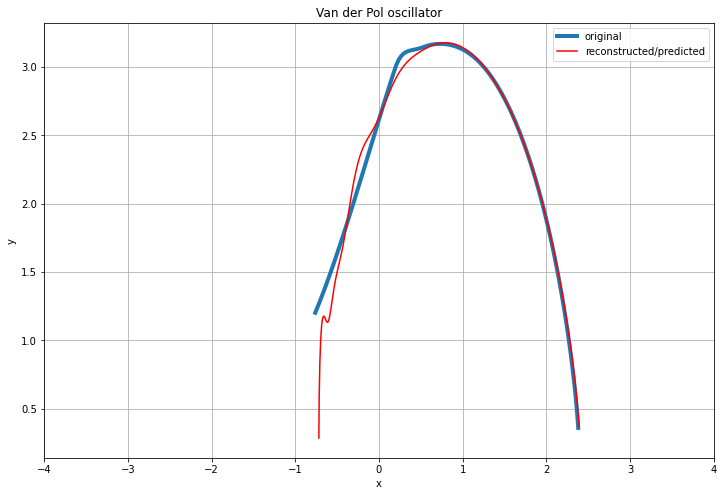

In [14]:
plt.figure(figsize=(12, 8))
plt.plot(vdp[0,poc:zav+rec], vdp[1,poc:zav+rec],lw=4, label=f"original")
plt.plot(reconstructed[0,:], reconstructed[1,:], label=f"reconstructed/predicted", color="red")

    
plt.title("Van der Pol oscillator")
plt.xlabel("x")
plt.xlim((-4,4))
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

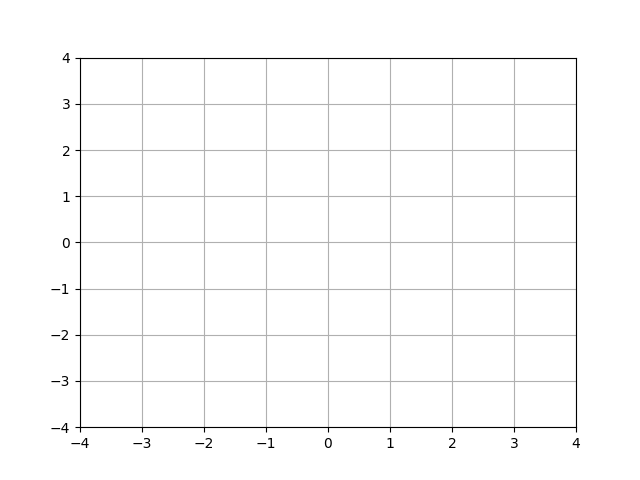

In [22]:
%matplotlib widget

fig, ax = plt.subplots()

line2 = ax.plot(vdp[0,poc], vdp[1,poc], lw=4, color="blue")[0]
line1 = ax.plot(reconstructed[0,0], reconstructed[1,0], lw=2, color="red")[0]
ax.set_xbound(-4,4); ax.set_ybound(-4,4)
plt.grid()


def update(frame):
    # for each frame, update the data stored on each artist.
    x = vdp[0,poc:(poc+frame)]
    y = vdp[1,poc:(poc+frame)]
    x_r = reconstructed[0,:frame]
    y_r = reconstructed[1,:frame]
    # update the line plot:
    line2.set_xdata(x)
    line2.set_ydata(y)
    line1.set_xdata(x_r)
    line1.set_ydata(y_r)
    return (line2, line1)


ani = animation.FuncAnimation(fig=fig, func=update, frames=zav-poc+rec, interval=150, blit=True, repeat=False)
plt.show()

**adding and removing snapshots**


...

In [15]:
%matplotlib inline

(3,)
(3,)
(3,)
(4,)
(4,)
(4,)
(4,)
(4,)
(3,)
(0,)
(1,)
(1,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(3,)
(3,)
(5,)
(5,)
(5,)
(5,)
(5,)
(5,)
(5,)
(5,)
(5,)
(5,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(5,)
(5,)


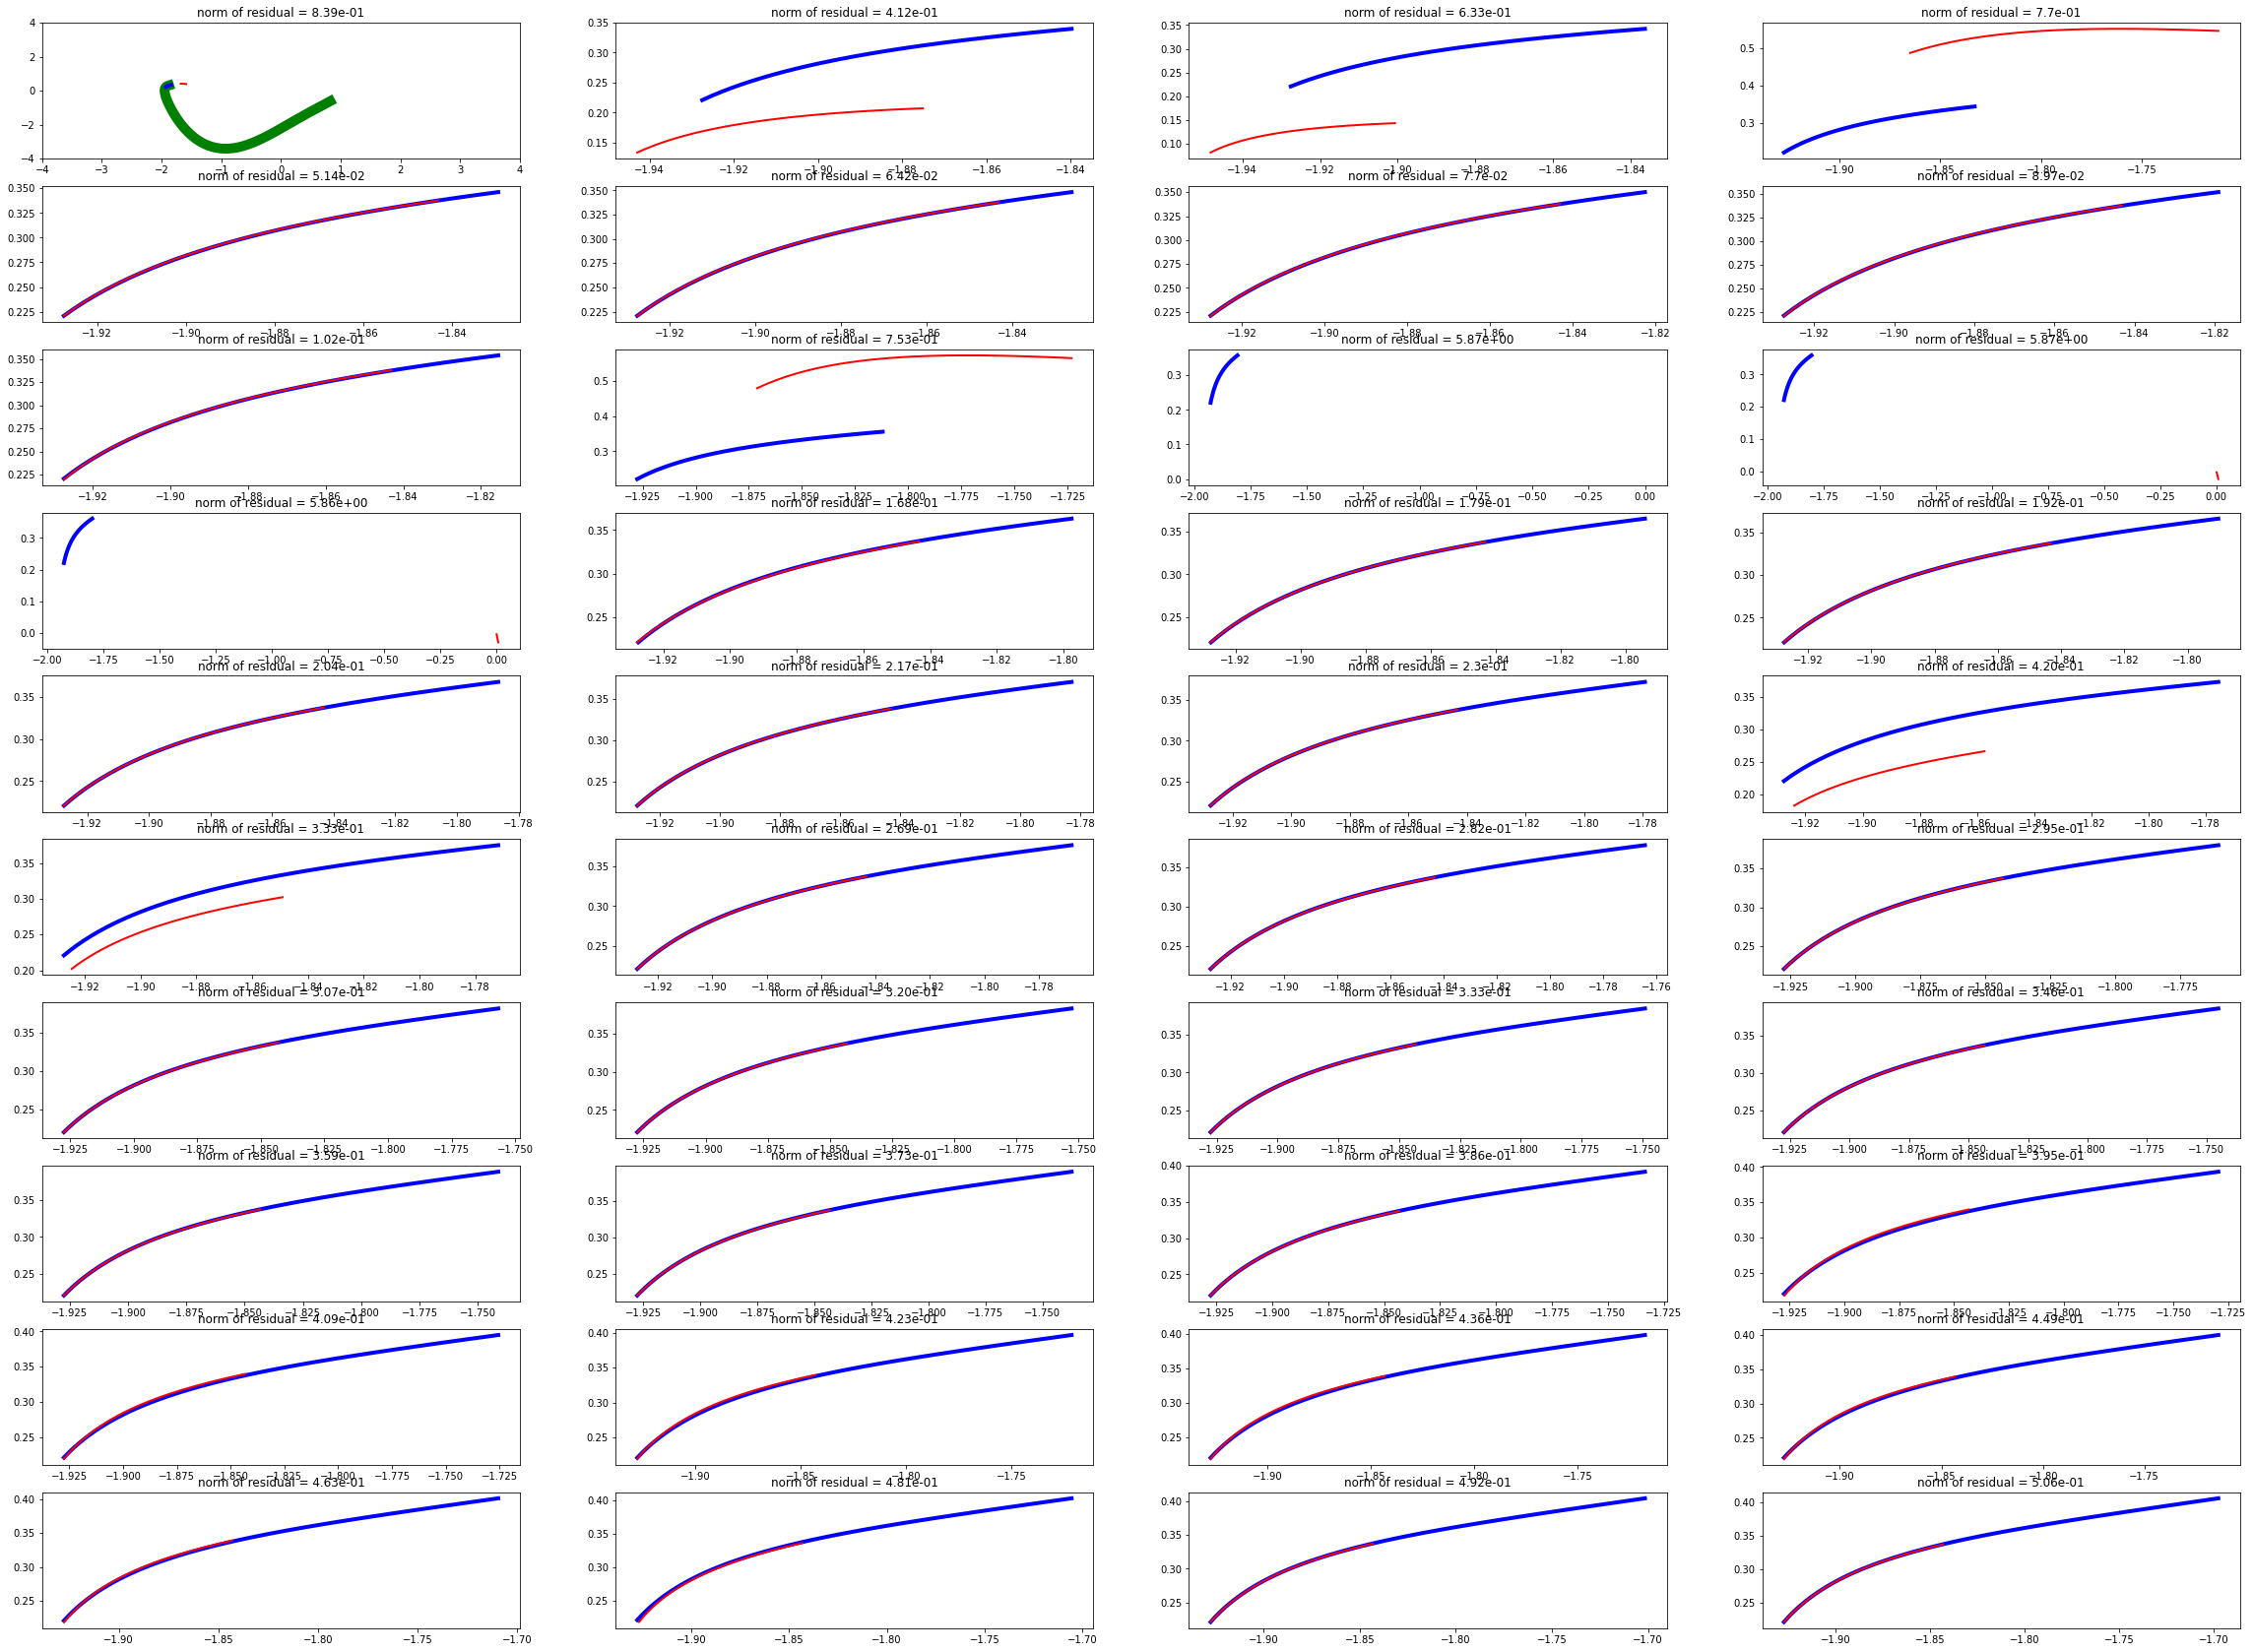

In [ ]:
####################################################################################################################################
#           BEZ WEIGHTS
####################################################################################################################################


#dodajem 1
koliko_predvidam=10

poc=400; zav=500


koliko_x=10; koliko_y=4
fig, axs = plt.subplots(koliko_x, koliko_y, figsize=(40,30), squeeze=True)

Z, L, r, Q, R = GEDMDQ(vdp[:,poc:zav], tol=1e-6)  ######################## Bilo je potrebno smanjiti tolerance (za odredivanje numerickog ranga) - sad vise nema ni linalg error u solve:)

threshold=1e-2
indices = np.where(r < threshold)[0]
times=[i for i in range(zav-poc+koliko_predvidam)]
predicted=DMD_reconstruction(vdp[:,poc:(zav-1)], Z, indices, L, times)
#predicted=DMD_reconstruction(vdp[:,poc:(zav-1)], Z, indices, L, times, weights=weights)

axs[0,0].plot(vdp[-2, :zav], vdp[-1,:zav], color="green", lw=10) 
axs[0,0].plot(vdp[-2, poc:zav+koliko_predvidam], vdp[-1,poc:zav+koliko_predvidam], color="blue", lw=4)
axs[0,0].plot(predicted[-2,:], predicted[-1,:], color="red", lw=2)
axs[0,0].set_xlim((-4,4)); axs[0,0].set_ylim((-4,4))
res=np.linalg.norm(predicted[-2:,-koliko_predvidam:]-vdp[-2:,zav:zav+koliko_predvidam])
axs[0,0].set_title("norm of residual = {}".format(np.format_float_scientific(res, precision=2)))


br=0
for i in range(koliko_x):
    for j in range(koliko_y):
        if(i==0 and j==0):
            continue
        zav=zav+1
        #neki uvjet kada odbacujem - ako sam skratila window nema smisla odmah odbaciti
        if(zav-poc>60):
            poc=poc+1
            _,_,_,Q,R,_ = DMD_discarding_snap(1, Q, R, tol=1e-6)
        
        Z, L, r, Q, R = DMD_added_snap(vdp[:,(zav-1):zav], Q, R, tol=1e-6)

        indices=np.where(r < threshold)[0]
        print(indices.shape)


        predicted = DMD_reconstruction(vdp[:,poc:(zav-1)], Z, indices, L, times)
        
        axs[i,j].plot(vdp[-2, poc:zav+koliko_predvidam], vdp[-1,poc:zav+koliko_predvidam], color="blue", lw=4)
        axs[i,j].plot(predicted[-2,:], predicted[-1,:], color="red", lw=2)
        res=np.linalg.norm(predicted[-2:,-koliko_predvidam:]-vdp[-2:,zav:zav+koliko_predvidam])
        axs[i,j].set_title("norm of residual = {}".format(np.format_float_scientific(res, precision=2)))
        #threshold=1e-2
    #ako norma res < 1e-1 npr. odsječi sve osim zadnjih k
    # ovo jako lose radi... zasto...
        """if res > 0.5 and zav-poc>60:
            poc=zav-30
            threshold = 1e-1"""


(8,)
(14,)
(16,)
(16,)
(16,)
(21,)
(21,)
(18,)
(23,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(23,)
(23,)
(21,)
(21,)
(21,)
(21,)
(23,)
(23,)
(21,)
(20,)
(21,)
(20,)
(24,)
(24,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(26,)


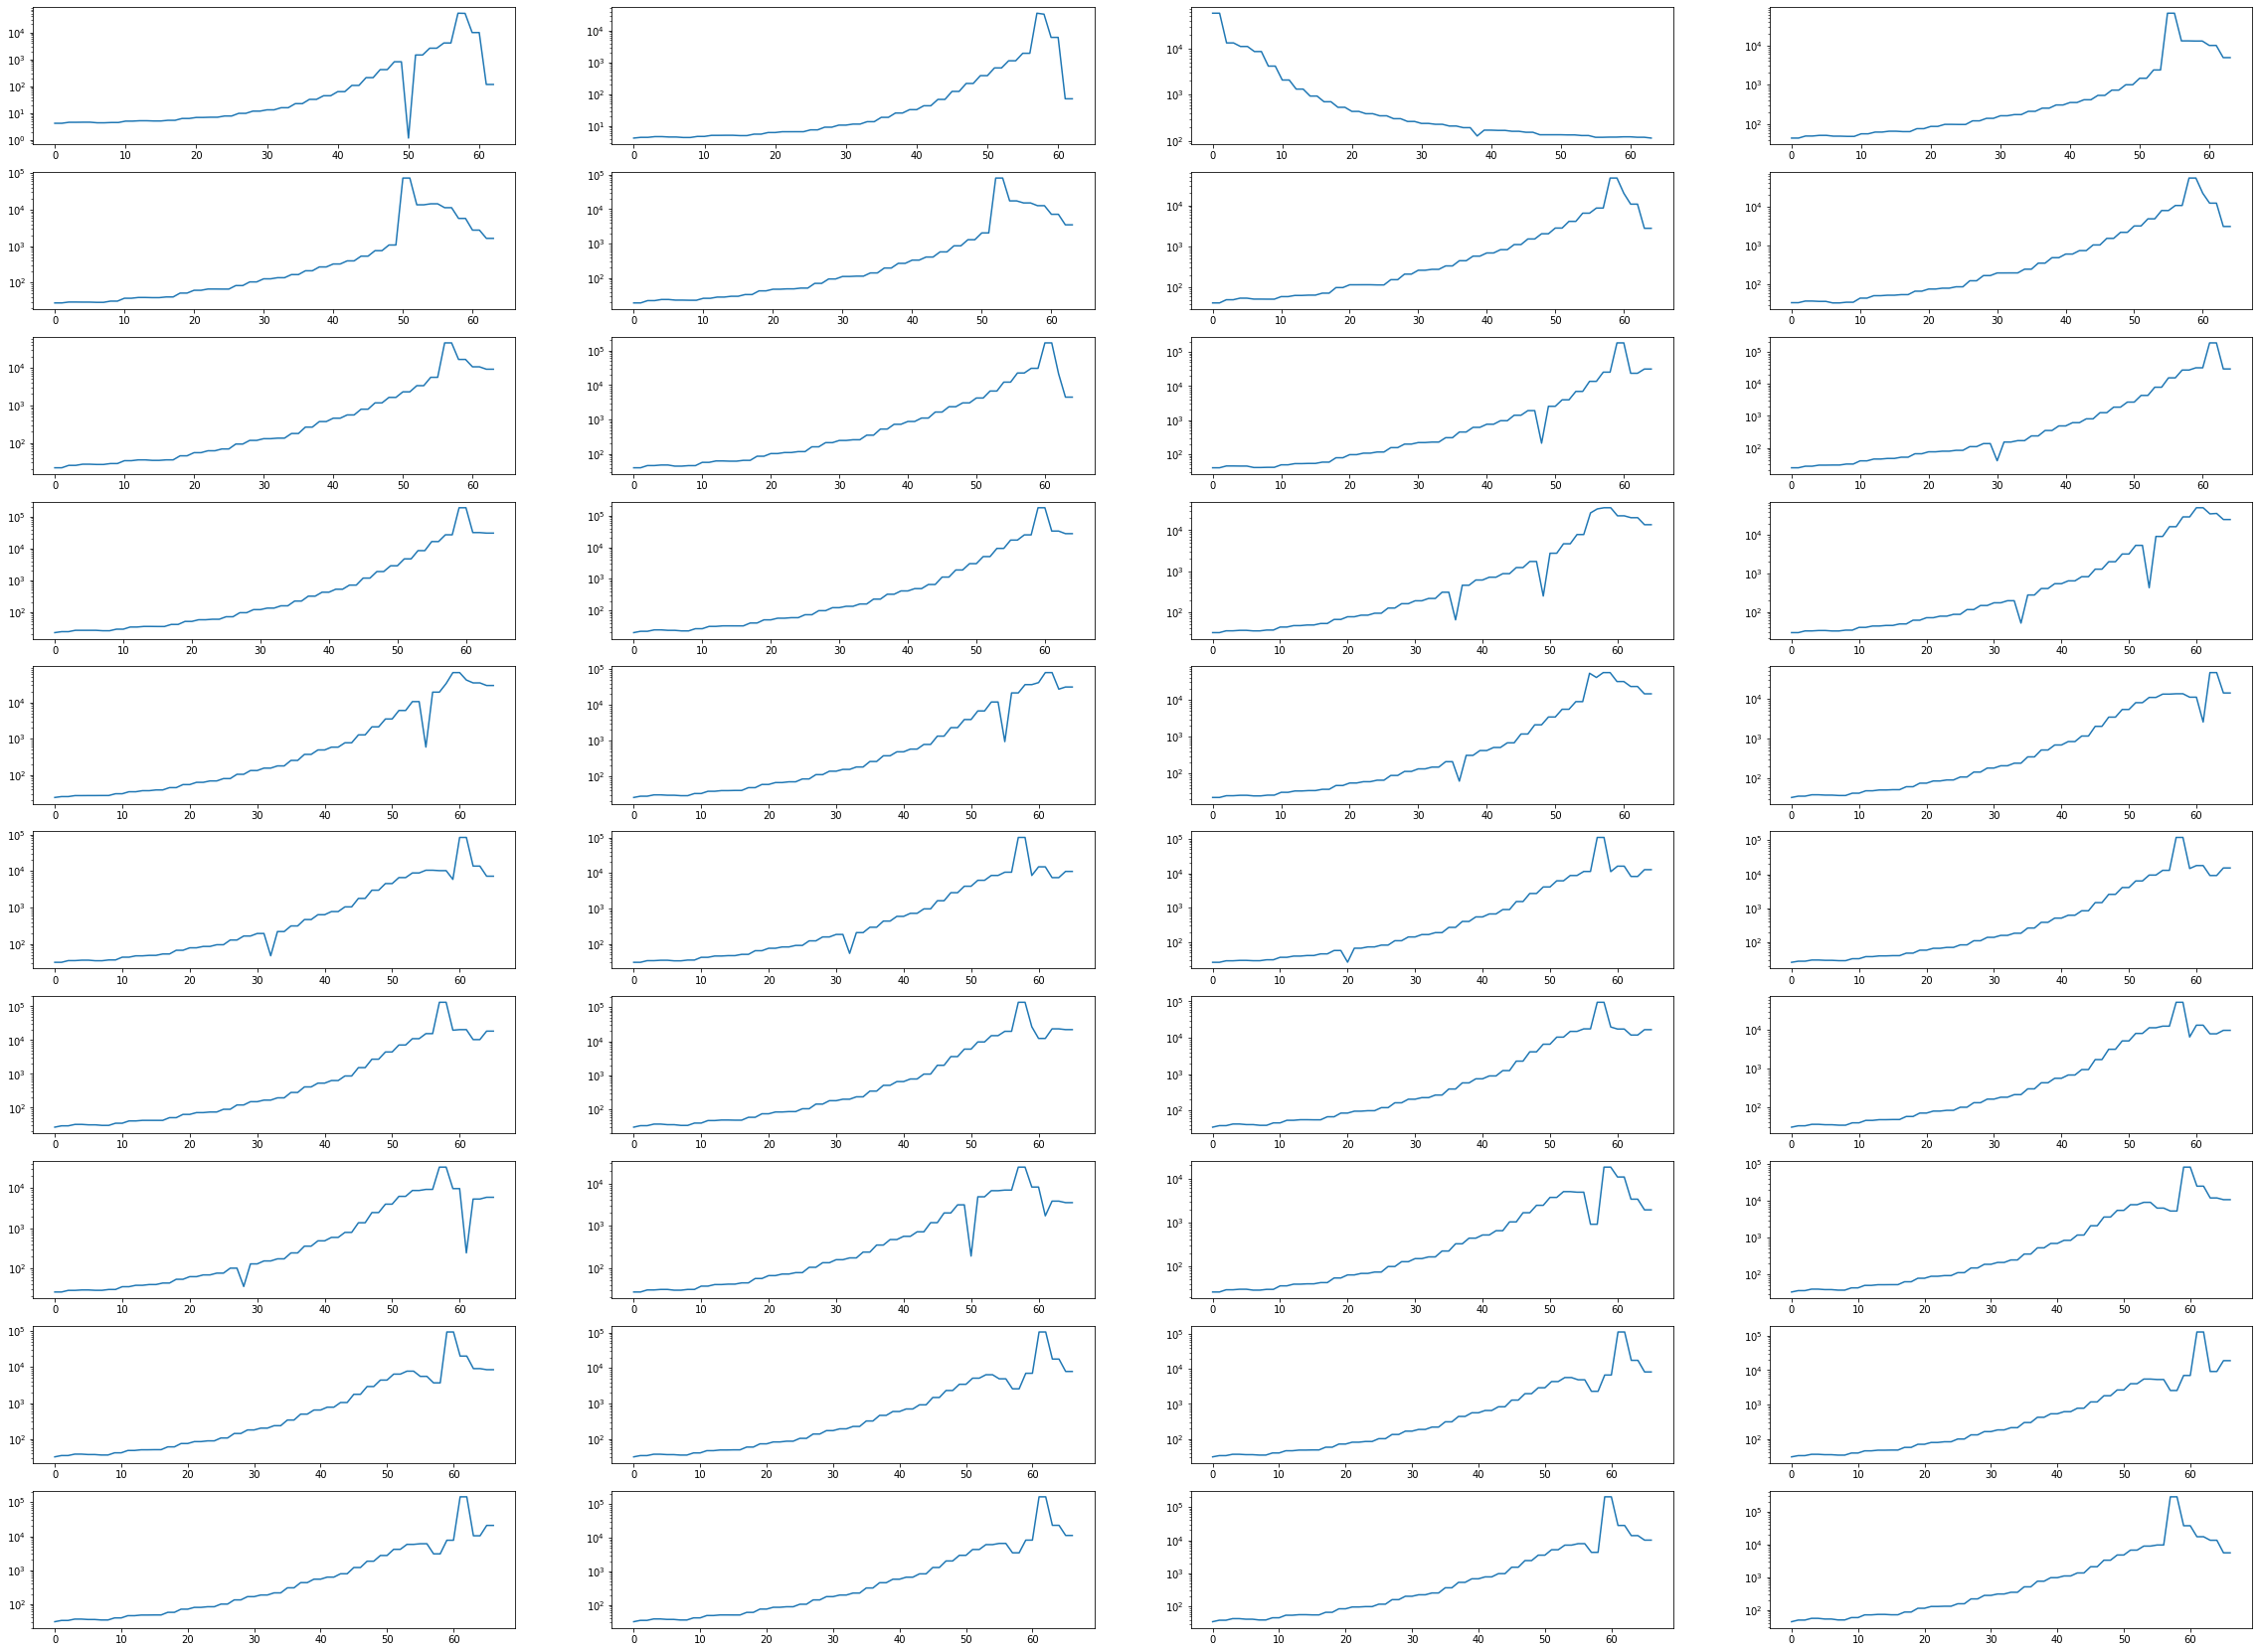

In [ ]:
####################################################################################################################################
#           BEZ WEIGHTS
####################################################################################################################################


#dodajem 1
koliko_predvidam=10

#moram opet def jer ih gore promijenim u kodu
poc=400; zav=500

koliko_x=10; koliko_y=4
fig, axs = plt.subplots(koliko_x, koliko_y, figsize=(40,30), squeeze=True)

Z, L, r, Q, R = GEDMDQ(vdp[:,poc:zav], tol=1e-6)

threshold=1e-2
indices = np.where(r < threshold)[0]
times=[i for i in range(zav-poc+koliko_predvidam)]
predicted=DMD_reconstruction(vdp[:,poc:(zav-1)], Z, indices, L, times)
#predicted=DMD_reconstruction(vdp[:,poc:(zav-1)], Z, indices, L, times, weights=weights)

axs[0,0].plot(1/r)
axs[0,0].set_yscale('log')

br=0
for i in range(koliko_x):
    for j in range(koliko_y):
        if(i==0 and j==0):
            continue
        poc=poc+1; zav=zav+1
        if(zav-poc>60):
            _,_,_,Q,R,_ = DMD_discarding_snap(1, Q, R, tol=1e-6)
        
        Z, L, r, Q, R = DMD_added_snap(vdp[:,(zav-1):zav], Q, R, tol=1e-6)

        indices=np.where(r < threshold)[0]
        print(indices.shape)


        predicted = DMD_reconstruction(vdp[:,poc:(zav-1)], Z, indices, L, times)
        
        axs[i,j].plot(1/r)
        axs[i,j].set_yscale('log')
        #threshold=1/50
    #ako norma res < 1e-1 npr. odsječi sve osim zadnjih k
    # ovo jako lose radi... zasto...
        """if res > 0.5:
            poc=zav-30
            threshold = 1"""


In [46]:
####################################################################################################################################
#           BEZ WEIGHTS
####################################################################################################################################


#dodajem 1
koliko_predvidam=1

poc=0; zav=100

Z, L, r, Q, R = GEDMDQ(vdp[:,poc:zav], tol=1e-6)  ######################## Bilo je potrebno smanjiti tolerance (za odredivanje numerickog ranga) - sad vise nema ni linalg error u solve:)

threshold=1e-2
threshold=1
indices = np.where(r < threshold)[0]
times=[100]
predicted=np.empty(vdp[:,100:].shape)
predicted[:,0]=DMD_reconstruction(vdp[:,poc:zav-1], Z, indices, L, times).reshape(-1)
#predicted=DMD_reconstruction(vdp[:,poc:(zav-1)], Z, indices, L, times, weights=weights)

all_res = []

for i in range(1,vdp.shape[1]-101):
        zav=zav+1
        poc=poc+1
        _,_,_,Q,R,_ = DMD_discarding_snap(1, Q, R, tol=1e-6)

        Z, L, r, Q, R = DMD_added_snap(vdp[:,(zav-1):zav], Q, R, tol=1e-6, ngram=5)
        #print(np.allclose(Q@R, vdp[:,poc:zav])) - jako dobra procjena 

        
        indices=np.where(r < threshold)[0]
        #print(indices.shape)

        """if(i%100==0):
            print("ortogonalnost", np.allclose(Q.T@Q, np.eye(Q.shape[1], Q.shape[1])))  ###ostaje ortogonalno sada:)"""

        predicted[:,i] = DMD_reconstruction(vdp[:,poc:(zav-1)], Z, indices, L, times).reshape(-1)

        res=np.linalg.norm(predicted[-2:,-koliko_predvidam:]-vdp[-2:,zav:zav+koliko_predvidam])
        all_res+=[res]

        #threshold=1e-2
    #ako norma res < 1e-1 npr. odsječi sve osim zadnjih k
    # ovo jako lose radi... zasto...
        """ if res > 0.5 and zav-poc>50:
            poc=zav-30
            threshold = 1e-1"""


### sada je i brze nego kad smo imali bez reortogonalizacije jer je tamo bilo puno ill-cond matrica, cesto se za solve radila nova instanca...

c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:16: LinAlgWarning: Ill-conditioned matrix (rcond=3.54565e-17): result may not be accurate.
  app.launch_new_instance()
c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:16: LinAlgWarning: Ill-conditioned matrix (rcond=2.98809e-166): result may not be accurate.
  app.launch_new_instance()
c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:16: LinAlgWarning: Ill-conditioned matrix (rcond=7.87317e-97): result may not be accurate.
  app.launch_new_instance()
c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:16: LinAlgWarning: Ill-conditioned matrix (rcond=1.44856e-54): result may not be accurate.
  app.launch_new_instance()
c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:16: LinAlgWarning: Ill-conditioned matrix (rcond=6.92388e-49): result may not be accurate.
  app.launch_new_instance()
c:\Users\elawi\mini

In [37]:
np.where(np.array(all_res)>3)[0]

array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,   14,   15,  340,  341,  342,  343,  344,  345,
        346,  347,  348,  349,  350,  351,  352,  353,  354,  355,  356,
        357,  358,  359,  360,  361,  362,  363,  364,  365,  366,  367,
        368,  369,  370,  371,  372,  373,  374,  375,  376,  377,  378,
        379,  380,  381,  382,  383,  384,  385,  386,  387,  388,  389,
        390, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061,
       1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072,
       1073, 1074, 1075, 1076, 1077, 1078, 1079, 1080, 1081, 1082, 1083,
       1084, 1085, 1839], dtype=int64)

### window dmd

In [ ]:
####################################################################################################################################
#           BEZ WEIGHTS
####################################################################################################################################


#dodajem 1
koliko_predvidam=1

poc=0; zav=100

Z, L, r, Q, R = GEDMDQ(vdp[:,poc:zav], tol=1e-6)  ######################## Bilo je potrebno smanjiti tolerance (za odredivanje numerickog ranga) - sad vise nema ni linalg error u solve:)

threshold=1e-2
#threshold=1
indices = np.where(r < threshold)[0]
times=[zav-poc]
predicted=np.empty(vdp[:,100:].shape)
predicted[:,0]=DMD_reconstruction(vdp[:,poc:zav-1], Z, indices, L, times).reshape(-1)
#predicted=DMD_reconstruction(vdp[:,poc:(zav-1)], Z, indices, L, times, weights=weights)


br=0; thresh_res=3; leave=30
for i in range(1,vdp.shape[1]-100):
        zav=zav+1
        if(zav-poc>=100):
            poc=poc+1
            _,_,_,Q,R,_ = DMD_discarding_snap(1, Q, R, tol=1e-6)

        Z, L, r, Q, R = DMD_added_snap(vdp[:,(zav-1):zav], Q, R, tol=1e-6, ngram=5)
        #print(np.allclose(Q@R, vdp[:,poc:zav])) - jako dobra procjena 

        times = [zav-poc]  ################################################## PROVJERI
        if(zav-poc>=100):
                indices=np.where(r < threshold)[0]
        else:
               indices=np.where(r<max(np.mean(r), threshold))[0] #bolje nego da se stavi r<threshold...
        #print(indices.shape)

        predicted[:,i] = DMD_reconstruction(vdp[:,poc:(zav-1)], Z, indices, L, times).reshape(-1)

        res=np.linalg.norm(predicted[-2:,-koliko_predvidam:]-vdp[-2:,zav:zav+koliko_predvidam])
        
        if(res>thresh_res):
                br+=1
        else:
                br=0 #ili br = max(br-1, 0)
        if(br>20 and zav-poc>50): #20 puta za redom imali veliku gresku - rezemo i ako smo "napunili malo podatke"
            _,_,_,Q,R,_ = DMD_discarding_snap(zav-leave-poc, Q, R, tol=1e-6)
            poc=zav-leave  #smanjili window na duljinu leave ############################################## mozda nesto drugo bolje?   ### treba li smanjiti threshold
            br=0
            #thresh_res = 1.5
            print(i)
            print(poc, zav)

#brze se "ispravi" nego bez smanjenja windowa

c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:16: LinAlgWarning: Ill-conditioned matrix (rcond=4.39002e-19): result may not be accurate.
  app.launch_new_instance()
c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:16: LinAlgWarning: Ill-conditioned matrix (rcond=1.93822e-20): result may not be accurate.
  app.launch_new_instance()
c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:16: LinAlgWarning: Ill-conditioned matrix (rcond=8.62022e-29): result may not be accurate.
  app.launch_new_instance()
c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:16: LinAlgWarning: Ill-conditioned matrix (rcond=9.10821e-18): result may not be accurate.
  app.launch_new_instance()
c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:16: LinAlgWarning: Ill-conditioned matrix (rcond=1.64877e-17): result may not be accurate.
  app.launch_new_instance()
c:\Users\elawi\minic

361
431 461
382
452 482


c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:16: LinAlgWarning: Ill-conditioned matrix (rcond=1.2018e-47): result may not be accurate.
  app.launch_new_instance()
c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:16: LinAlgWarning: Ill-conditioned matrix (rcond=2.81e-41): result may not be accurate.
  app.launch_new_instance()
c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:16: LinAlgWarning: Ill-conditioned matrix (rcond=4.51408e-31): result may not be accurate.
  app.launch_new_instance()
c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:16: LinAlgWarning: Ill-conditioned matrix (rcond=7.27241e-25): result may not be accurate.
  app.launch_new_instance()
c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:16: LinAlgWarning: Ill-conditioned matrix (rcond=9.46277e-18): result may not be accurate.
  app.launch_new_instance()


1073
1143 1173


c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:16: LinAlgWarning: Ill-conditioned matrix (rcond=3.44018e-17): result may not be accurate.
  app.launch_new_instance()
c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:16: LinAlgWarning: Ill-conditioned matrix (rcond=4.16719e-47): result may not be accurate.
  app.launch_new_instance()
c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:16: LinAlgWarning: Ill-conditioned matrix (rcond=7.27172e-93): result may not be accurate.
  app.launch_new_instance()
c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:16: LinAlgWarning: Ill-conditioned matrix (rcond=1.85256e-112): result may not be accurate.
  app.launch_new_instance()
c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:16: LinAlgWarning: Ill-conditioned matrix (rcond=1.45456e-100): result may not be accurate.
  app.launch_new_instance()
c:\Users\elawi\min

In [56]:
%matplotlib inline

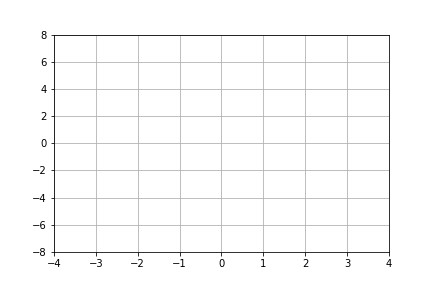

In [57]:
##############################################################################################################################
#############           windowed DMD 
##############################################################################################################################

%matplotlib widget
fig, ax = plt.subplots()

line2 = ax.plot(vdp[-2,99], vdp[-1,99], lw=4, color="blue")[0]
line1 = ax.plot(predicted[-2,0], predicted[-1,0], lw=2, color="red")[0]
ax.set_xbound(-4,4); ax.set_ybound(-8,8)
plt.grid()

def update(frame):
    # for each frame, update the data stored on each artist.
    x = vdp[-2,100:(100+frame)]
    y = vdp[-1,100:(100+frame)]
    x_r = predicted[-2,:frame]
    y_r = predicted[-1,:frame]
    # update the line plot:
    line2.set_xdata(x)
    line2.set_ydata(y)
    line1.set_xdata(x_r)
    line1.set_ydata(y_r)
    #legend.get_texts()[0].set_text(f'time={frame}, res={res}')
    return (line2, line1)


ani = animation.FuncAnimation(fig=fig, func=update, frames=vdp.shape[1]-160, interval=50, blit=True, repeat=False)
plt.show()